In [97]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
%matplotlib inline

This line %matplotlib inline is used to create the matplot lib visuals in the jupyter notebook right after the executed cell

In [99]:
airbnb_data=pd.read_csv("./Airbnb_Open_Data.csv",encoding_errors='ignore') 

/var/folders/6c/6y9594t91xd_wgh3nxs_rzbr0000gn/T/ipykernel_24637/562364522.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data=pd.read_csv("./Airbnb_Open_Data.csv",encoding_errors='ignore')


loading the airbnb data into a airbnb_data variable

In [100]:
airbnb_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Intial exploration

In [101]:
airbnb_data.shape

(102599, 26)

gives the shape of the data taken from the csv file which means the number of rows and columns in the csv file
there are 102599 rows in the file and
there are 26 column/features present in the data


In [102]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

here in the info we can see that the id is having the count and non null values as a column name here we can say that the id is not having having any null as the count is equal to the count of the rows in the shape and for the name we can say taht the it has the 250 null values with object type as "object"
like wise so for the remaining columns


In [103]:
airbnb_data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


here the describe gives the statistical summary of the data where each numerical column if you want to perform the statistical summary for the categorical columns use the one hot encoding for the norminal data and for the oridinal data use the label encoding by using the ohe or label encoding you will be losing the column name of the categorical columns


here if you see that the price is not shown in the describing as if you see the datatype of it is object which mean that the it has the value which is preventing it from numerical datatype


In [104]:
airbnb_data['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [105]:
airbnb_data['price']= airbnb_data['price'].apply(lambda x: int(str(x).replace("$", "").replace(",", "").strip())if pd.notna(x) else 0)
airbnb_data['service fee']= airbnb_data['service fee'].apply(lambda x: int(str(x).replace("$", "").replace(",", "").strip())if pd.notna(x) else 0)

here we are trying to remove the dollor sign from the columna nd also we are handling the float, int and straing values eg for the string is nan which mean the null in the column 

In [106]:
airbnb_data['price']

0          966
1          142
2          620
3          368
4          204
          ... 
102594     844
102595     837
102596     988
102597     546
102598    1032
Name: price, Length: 102599, dtype: int64

In [107]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [108]:
airbnb_data.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102599.000000,102599.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,623.788185,124.694247,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,332.686420,66.549843,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,0.000000,0.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,337.000000,67.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,623.000000,124.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,912.000000,182.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


now we can see the price because this column is now int

**Data cleaning

checking for the null value in the each column by using the isnull()

In [109]:
airbnb_data.isnull()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
102595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
102597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


to get the value of the number of missing value in the column is that the add the number of nulls sum()

In [110]:
airbnb_data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                  0
service fee                            0
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

here we can say that the license column is compltely empty were two values in the column and now the one column is the name and the other one is the license which will not give any information about the license in this case we can drop the column as we can say that the more column is causing the "Cruse of dimensenality", likewise we can see the are more number of column having the nan values we need to take care of the column

In [111]:
airbnb_data.drop(columns=['license'],inplace=True)

In [112]:
airbnb_data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,368,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844,169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,988,198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,546,109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN


here we have the combination of numerical and catogorical columns where the 
NUMERICAL CAN BE REPLACED BY THE MEAN VALUE
CATOGORICAL CAN BE REPLACED BY THE MODE VALUE

In [113]:
# Fill numerical columns with mean
numerical_columns = ['lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'price']
airbnb_data[numerical_columns] = airbnb_data[numerical_columns].fillna(airbnb_data[numerical_columns].mean())

# Fill categorical columns with mode
categorical_columns = ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 
                       'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 
                       'service fee', 'last review', 'reviews per month', 'house_rules']
for col in categorical_columns:
    airbnb_data[col] = airbnb_data[col].fillna(airbnb_data[col].mode()[0])

# Handle special cases
airbnb_data['last review'] = airbnb_data['last review'].fillna('No reviews') 
airbnb_data['reviews per month'] = airbnb_data['reviews per month'].fillna(0)



# Check for remaining missing data
print(airbnb_data.isnull().sum())


id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
last review                         0
reviews per month                   0
review rate number                326
calculated host listings count    319
availability 365                  448
house_rules                         0
dtype: int64


/var/folders/6c/6y9594t91xd_wgh3nxs_rzbr0000gn/T/ipykernel_24637/3403137628.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_data[col] = airbnb_data[col].fillna(airbnb_data[col].mode()[0])


here by this we will be handling the missing values taking the mean or mode based on the value type either it may be numberical or catogorical values respectively 

In [114]:

airbnb_data.duplicated().sum()

541

here we are cheking the duplicated rowing in the data and we found that we have 541 duplicate row we are droping the rows 

In [115]:
#to see the duplicate the rows
airbnb_data[airbnb_data.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,706,141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,#NAME?
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,651,130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,#NAME?
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,907,181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,#NAME?
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,589,118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,#NAME?
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,356,71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,#NAME?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844,169,1.0,0.0,6/23/2019,0.03,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,988,198,3.0,0.0,6/23/2019,0.03,5.0,1.0,342.0,#NAME?
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,546,109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,#NAME?


In [116]:
#to drop the duplicatde
airbnb_data.drop_duplicates(inplace=True)

In [117]:
airbnb_data.duplicated().sum()

0

we can see that we have droped the duplicated rows

In [118]:
airbnb_data.dtypes


airbnb_data['id'] = airbnb_data['id'].astype(object)
airbnb_data['host id'] = airbnb_data['host id'].astype(object)

airbnb_data.dtypes

id                                 object
NAME                               object
host id                            object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                     bool
cancellation_policy                object
room type                          object
Construction year                 float64
price                               int64
service fee                         int64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

**Univariate analysis

analysing the single column varaibles, explaination of data distribution of one columns only


In [119]:
airbnb_data['price']

0          966
1          142
2          620
3          368
4          204
          ... 
102053     696
102054     909
102055     387
102056     848
102057    1128
Name: price, Length: 102058, dtype: int64

Text(0, 0.5, 'Frequency')

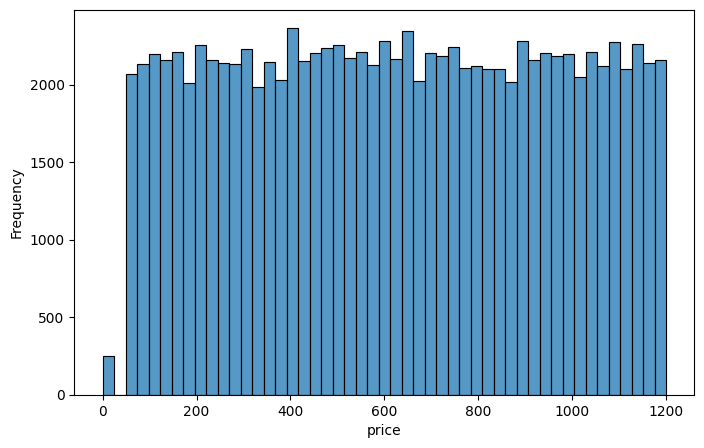

In [120]:
plt.figure(figsize=(8,5))
sns.histplot(data=airbnb_data,x="price")
plt.ylabel("Frequency")

A histogram is a graphical representation of the distribution of numerical data. It shows how data is distributed across various intervals, known as bins, and is used to summarize the distribution of data by showing the frequency (or count) of data points within these bins.



**identifying boxplot

<Axes: xlabel='price'>

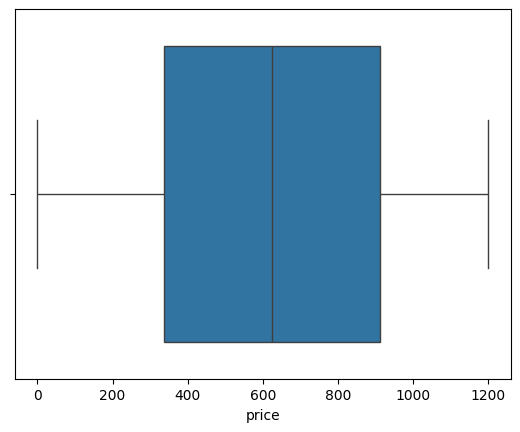

In [121]:
sns.boxplot(data=airbnb_data,x="price")

Text(0, 0.5, 'Frequency')

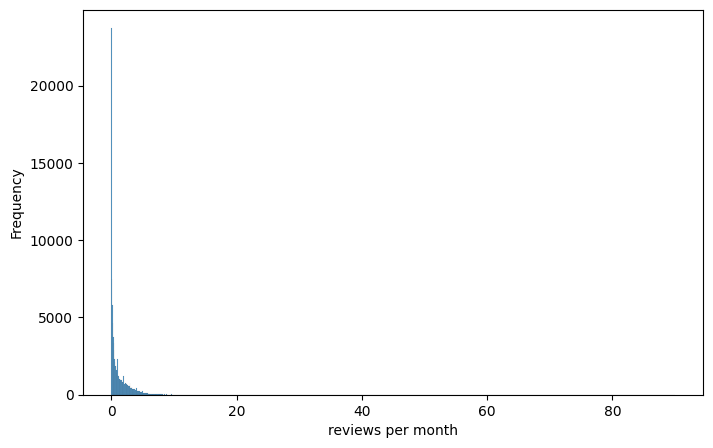

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(data=airbnb_data,x="reviews per month")
plt.ylabel("Frequency")

<Axes: xlabel='reviews per month'>

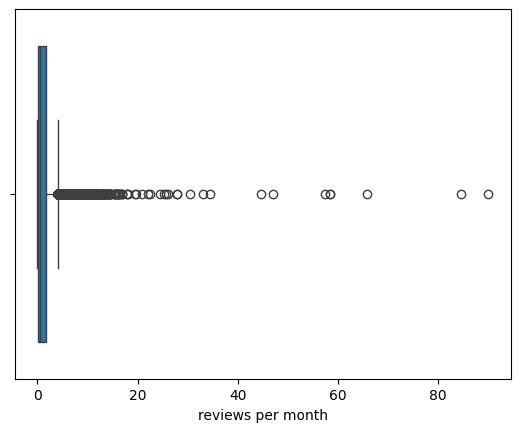

In [123]:
sns.boxplot(data=airbnb_data,x="reviews per month")


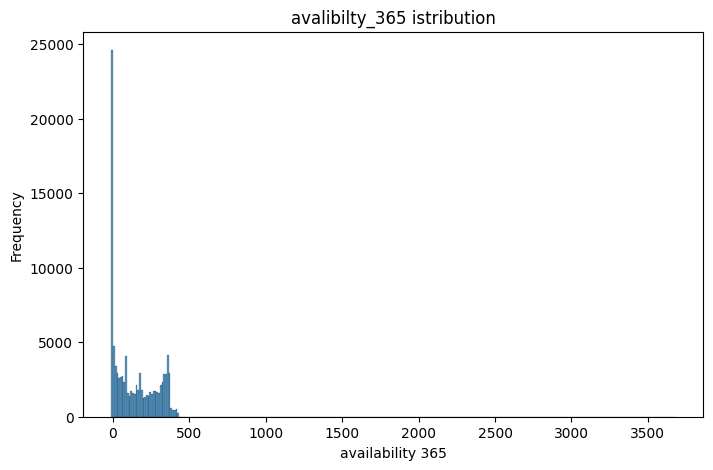

In [124]:
plt.figure(figsize=(8,5))
sns.histplot(data=airbnb_data,x="availability 365")
plt.title('avalibilty_365 istribution')
plt.ylabel("Frequency")
plt.show()

In [125]:
airbnb_data.groupby(by='neighbourhood group')['price'].mean()

neighbourhood group
Bronx            626.133630
Brooklyn         625.102378
Manhattan        621.088171
Queens           628.641131
Staten Island    622.017914
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

** Bi variable analysis
one variable dependency in another variable


<Axes: xlabel='neighbourhood group', ylabel='price'>

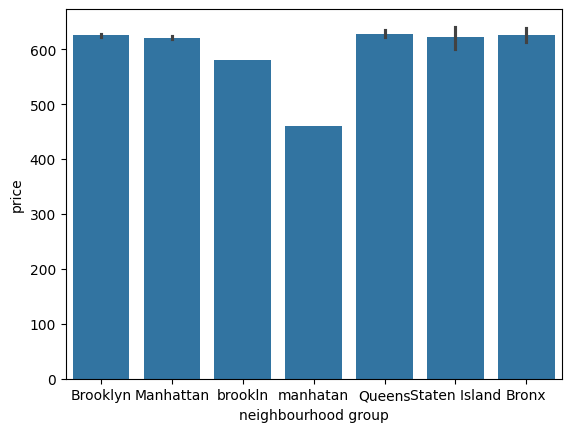

In [128]:
sns.barplot(data=airbnb_data,x='neighbourhood group',y='price')

<Axes: xlabel='neighbourhood group', ylabel='price'>

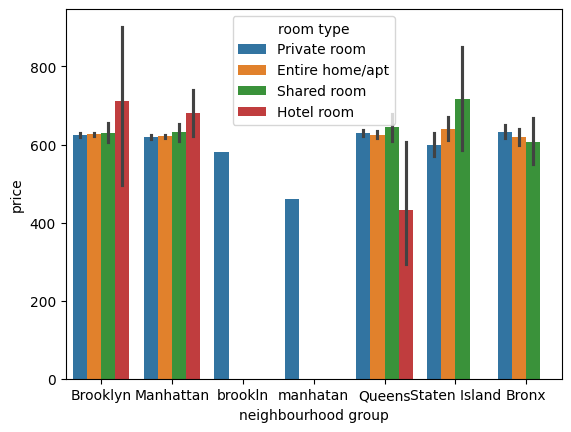

In [130]:
sns.barplot(data=airbnb_data,x='neighbourhood group',y='price',hue='room type')

<Axes: xlabel='number of reviews', ylabel='price'>

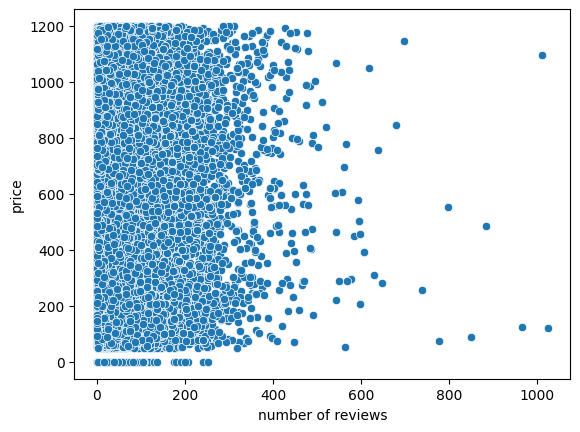

In [131]:
sns.scatterplot(data=airbnb_data,x='number of reviews',y='price')

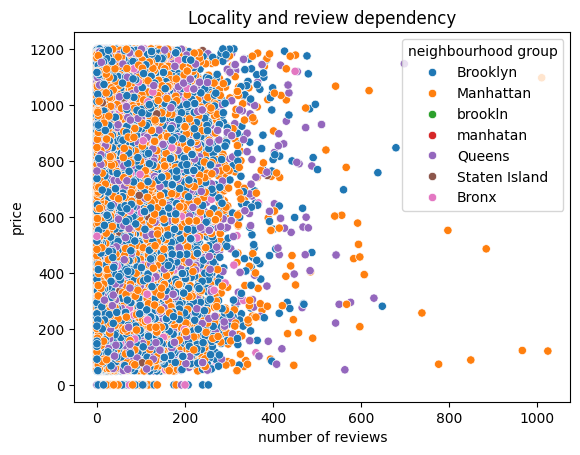

In [135]:
plt.title("Locality and review dependency")
sns.scatterplot(data=airbnb_data,x='number of reviews',y='price',hue='neighbourhood group')
plt.show()

In [136]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [138]:
airbnb_data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

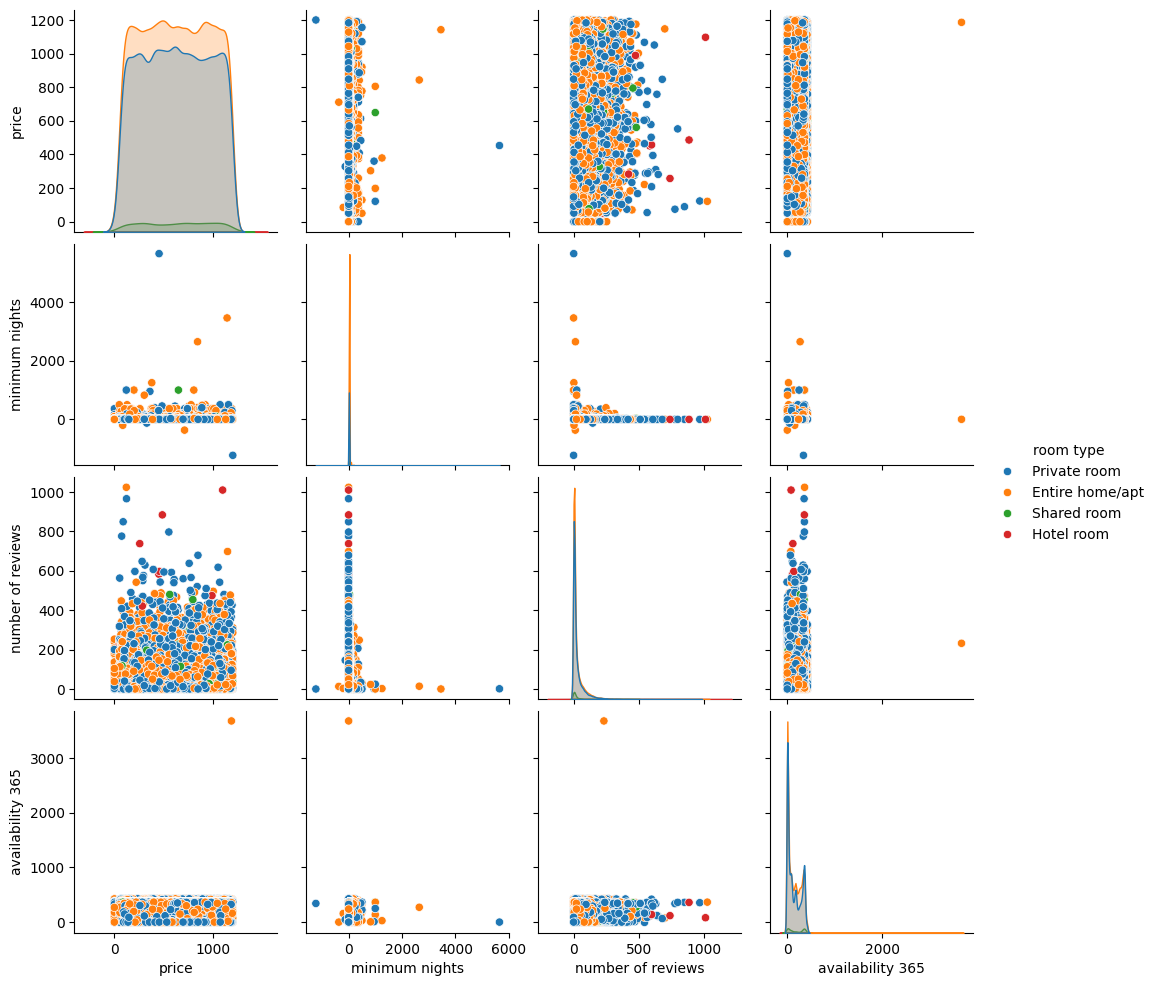

In [140]:
sns.pairplot(data=airbnb_data,vars=['price','minimum nights','number of reviews','availability 365'],hue='room type')

<Axes: xlabel='long', ylabel='lat'>

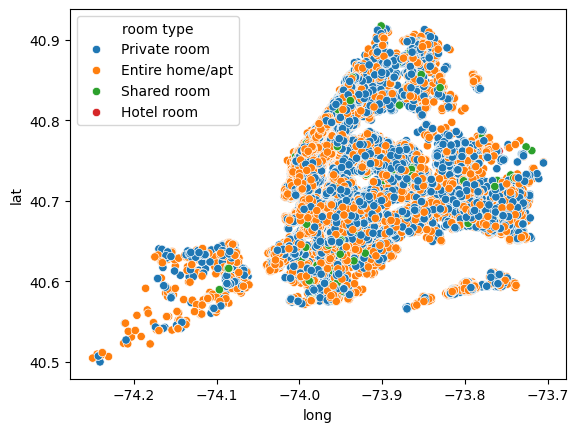

In [143]:
#Geographical distribution of Airbnb Listing
sns.scatterplot(data=airbnb_data,x='long',y='lat',hue='room type')

In [147]:
#heatmap = correlation of one variable with others for numerical column
corr=airbnb_data[['lat','long','price','minimum nights','number of reviews','reviews per month','availability 365']].corr()
corr

,lat,long,price,minimum nights,number of reviews,reviews per month,availability 365
lat,1.000000,0.074427,-0.005673,0.014890,-0.025136,-0.025453,-0.005054
long,0.074427,1.000000,0.003220,-0.039471,0.069154,0.121036,0.058214
price,-0.005673,0.003220,1.000000,-0.003890,0.005215,0.005919,-0.002939
minimum nights,0.014890,-0.039471,-0.003890,1.000000,-0.049732,-0.091558,0.063054
number of reviews,-0.025136,0.069154,0.005215,-0.049732,1.000000,0.617259,0.099515
reviews per month,-0.025453,0.121036,0.005919,-0.091558,0.617259,1.000000,0.072898
availability 365,-0.005054,0.058214,-0.002939,0.063054,0.099515,0.072898,1.000000


<Axes: >

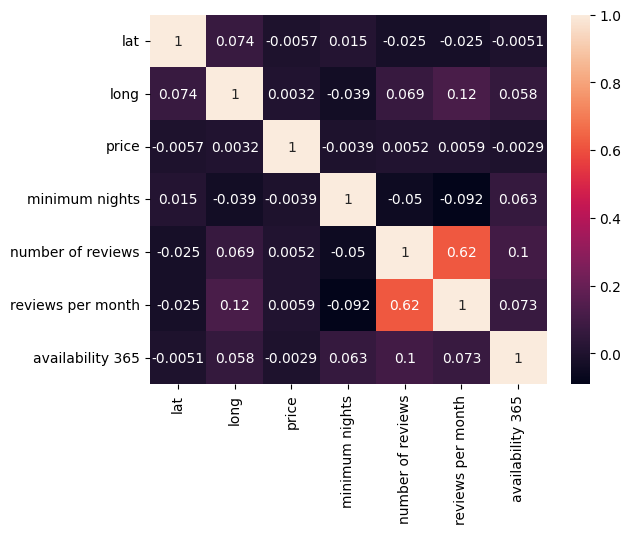

In [148]:
sns.heatmap(data=corr,annot=True)